# DEMMA  🔐

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import pickle

from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
import itertools

pd.set_option('display.max_columns',None)
%matplotlib inline 

c:\Users\Mr Dashi\Desktop\Ike's Project\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Importing Dataset

In [2]:
#df = pd.read_csv(r"C:\Users\Administrator\Desktop\DEMMA\complex\data\kddcup.data_10_percent_corrected")
df = pd.read_csv(r"Train_data.csv")
#df = pd.read_csv(r"C:\Users\Administrator\Desktop\DEMMA\complex\data\Ultimate.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome'])

In [8]:
# Assign name for columns
df.columns = columns

In [9]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [11]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.0,25192.0,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,0.001350,0.249841,0.014727,0.000357,0.004327,0.0,0.0,0.009130,84.591180,27.698754,0.286338,0.283762,0.118630,0.120260,0.660559,0.062363,0.095931,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,0.048785,11.500842,0.529602,0.018898,0.098524,0.0,0.0,0.095115,114.673451,72.468242,0.447312,0.447599,0.318745,0.322335,0.439637,0.178550,0.256583,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,144.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,2.000000,975.000000,40.000000,1.000000,8.000000,0.0,0.0,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.loc[df['outcome'] == "normal", "outcome"] = 'normal'
df.loc[df['outcome'] != 'normal', "outcome"] = 'attack'
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## 3. Data Preprocessing

In [14]:
df.loc[df['outcome'] == "normal", "outcome"] = 0
df.loc[df['outcome'] != 0, "outcome"] = 1
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [15]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login']
df.drop(cat_cols, axis=1, inplace=True)
df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [15]:
df.head()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.00,0.75,0.5,0.00,255,254,1.00,0.01,0.01,0.0,0.00,0.00,0.00,0.0,1,12
1,0,0,44,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,255,79,0.31,0.61,0.00,0.0,0.21,0.68,0.60,0.0,1,18
2,0,53,55,0,0,0,0,0,0,0,0,0,0,0,0,511,511,0.0,0.0,0.0,0.00,1.00,0.0,0.00,255,255,1.00,0.00,0.87,0.0,0.00,0.00,0.00,0.0,0,17
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.0,1.0,0.0,0.00,1.00,0.0,0.00,16,1,0.06,1.00,1.00,0.0,1.00,1.00,0.00,0.0,1,17
4,0,54540,8314,0,0,2,0,1,0,0,0,0,0,0,0,2,9,0.0,0.0,0.5,0.11,1.00,0.0,0.22,255,229,0.90,0.01,0.00,0.0,0.00,0.00,0.01,0.0,1,10


In [18]:
X = df.drop(['outcome'], axis=1)
y = df['outcome']


In [19]:
y=y.astype('int')

In [20]:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(X)

In [21]:
dump(std_scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

## 4. Feature Selection  and Train-Test-Split

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x = pca.fit_transform(x)

In [23]:
type(x)

numpy.ndarray

In [27]:
np.save('scaled-input', x)

In [28]:
n_components = 10

# Get the indices of the original features with the highest loadings in the first 10 principal components
top_feature_indices = np.argsort(np.abs(pca.components_[:n_components]), axis=1)[:, ::-1]

# Map the indices to the original feature names
original_feature_names = X.columns  # Replace with your actual feature names
selected_feature_names = [original_feature_names[i] for i in top_feature_indices.ravel()]

# Print the names of the top 10 selected features
print("Top 10 selected feature names:")
for feature_name in selected_feature_names[:n_components]:
    print(feature_name)

Top 10 selected feature names:
dst_host_serror_rate
dst_host_srv_serror_rate
same_srv_rate
serror_rate
srv_serror_rate
dst_host_same_srv_rate
dst_host_srv_count
count
dst_host_count
srv_diff_host_rate


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
x_train.shape

(20153, 10)

In [31]:
x_test.shape

(5039, 10)

## 5. Model Training

In [32]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    print("Training F1 Score " + str(name) + " {}  Test F1 Score ".format(train_f1*100) + str(name) + " {}".format(test_f1*100))

    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 98.39253820202421
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 98.30795262267344
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 98.26638477801268
Training F1 Score DecisionTreeClassifier 100.0  Test F1 Score DecisionTreeClassifier 98.28716430534998


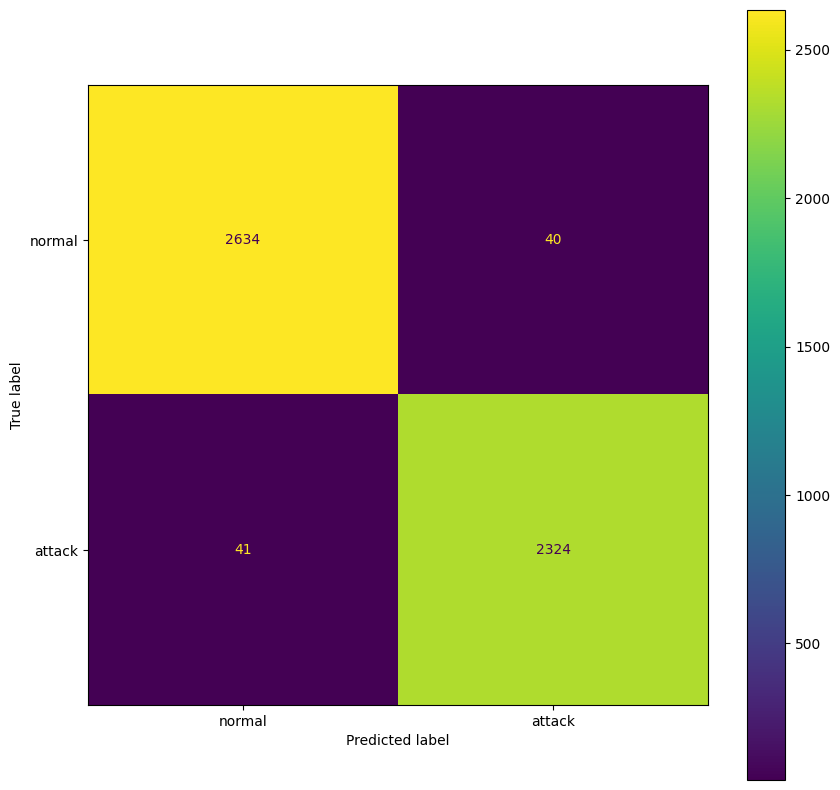

In [36]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
import pickle
with open('DecisionTreeClassifier.pkl', 'wb') as f:
    pickle.dump(model, f)

evaluate_classification(model, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

**Training Accuracy is 100% and 
Testing Accuracy is 97.67%**

## 6. Saving the Model

In [30]:
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

## 7, Making New Prediction

In [31]:
loaded_model = pickle.load(open(filename, 'rb'))

In [32]:
selected_features = ['dst_host_srv_rerror_rate',
'dst_host_rerror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'dst_host_same_srv_rate',
'diff_srv_rate',
'dst_host_srv_count',
'dst_host_diff_srv_rate',
'srv_count']

1. **dst_host_srv_rerror_rate** - float64, Range [0, 1]

2. **dst_host_rerror_rate** - float64, Range [0, 1]

3. **rerror_rate** - float64, Range [0, 1]

4. **srv_rerror_rate** - float64, Range [0, 1]

5. **same_srv_rate** - float64, Range [0, 1]

6. **dst_host_same_srv_rate** - float64, Range [0, 1]

7. **diff_srv_rate** - float64, Range [0, 1]

8. **dst_host_srv_count** - int64, Range [1, 255]

9. **dst_host_diff_srv_rate** - float64, Range [0, 1]

10. **srv_count** - int64, Range [1, 511]

In [33]:
def predict_with_model(features, loaded_model):
    # Ensure the input features are in the correct order and format
    input_features = np.array(features).reshape(1, -1)

    # Initialize a StandardScaler for scaling the features
    scaler = StandardScaler()
    
    z = np.load('scaled-input.npy')
    
    scaler.fit_transform(z)

    # Scale the input features
    scaled_features = scaler.transform(input_features)

    # Make predictions using the loaded decision tree model
    prediction = loaded_model.predict(scaled_features)

    # Return the prediction
    return prediction

In [44]:
input_features = [3.5, 0.3, 0.2, 0.4, 0.7, 0.8, 8.1, 100, 0.6, 50]  # Replace with your 10 features
model_predictions = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)

Model Predictions: [1]


In [37]:
input_features = [0.244, 0.6, 0.67, 0.434, 0.91, 0.4, 0.56, 250, 0.46, 100]  # Replace with your 10 features
model_predictions = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)

Model Predictions: [1]


In [45]:
def predict_with_model(features, loaded_model):
    # Ensure the input features are in the correct order and format
    input_features = np.array(features).reshape(1, -1)

    # Initialize a StandardScaler for scaling the features
    scaler = StandardScaler()
    
    z = np.load('scaled-input.npy')
    
    scaler.fit_transform(z)

    # Scale the input features
    scaled_features = scaler.transform(input_features)

    # Make predictions using the loaded model
    prediction = loaded_model.predict(scaled_features)

    # Convert numerical prediction to string labels
    if prediction == 0:
        prediction_label = "normal"
    else:
        prediction_label = "attack"

    # Return the prediction label
    return prediction_label

# Example usage:
input_features = [0.5, 0.3, 0.2, 0.4, 0.7, 0.8, 0.1, 100, 0.6, 50]  # Replace with your 10 features
model_predictions = predict_with_model(input_features, loaded_model)

print("Model Predictions:", model_predictions)


Model Predictions: attack


# NAIVE BAYEs

In [47]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()

In [48]:
model1.fit(x_train, y_train.values.ravel() )

GaussianNB()

In [49]:
print("Train score is:", model1.score(x_train, y_train))
print("Test score is:",model1.score(x_test,y_test))

Train score is: 0.8326827724443506
Test score is: 0.819831223628692


# Random forest


In [37]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(n_estimators=30)

In [38]:
model3.fit(x_train, y_train.values.ravel())
import pickle
with open('RandomForestClassifier.pkl', 'wb') as f:
    pickle.dump(model, f)

In [42]:
print("Train score is:", model3.score(x_train, y_train))
print("Test score is:",model3.score(x_test,y_test))



Train score is: 0.9998511387882697
Test score is: 0.9892835880134947


In [53]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [54]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

[I 2024-05-13 17:37:35,951] A new study created in memory with name: no-name-30d72cc2-7126-4008-a345-40a29fb4332f


[I 2024-05-13 17:37:36,336] Trial 0 finished with value: 0.9691983122362869 and parameters: {'KNN_n_neighbors': 16}. Best is trial 0 with value: 0.9691983122362869.


FrozenTrial(number=0, state=1, values=[0.9691983122362869], datetime_start=datetime.datetime(2024, 5, 13, 17, 37, 35, 952858), datetime_complete=datetime.datetime(2024, 5, 13, 17, 37, 36, 335661), params={'KNN_n_neighbors': 16}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [55]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")


Train Score: 0.9702500263740901
Test Score: 0.9691983122362869


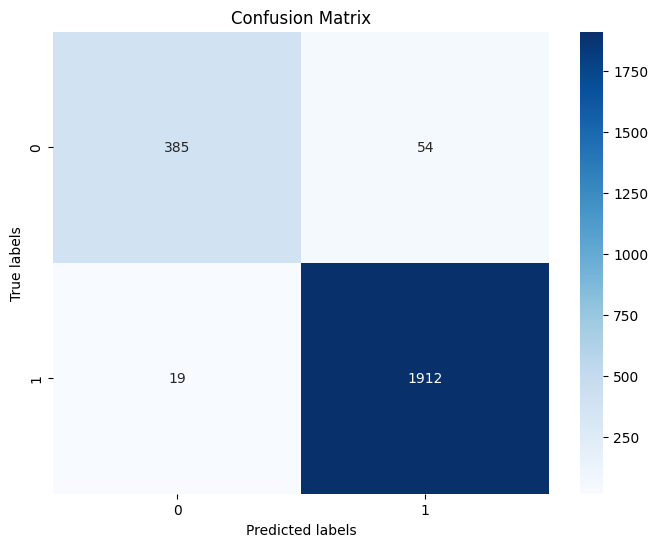

In [56]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your KNN_model and have predictions
y_pred = KNN_model.predict(x_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [57]:
import pandas as pd

def make_prediction(KNN_model, new_data):
    """Predicts the class for a new data point.

    Args:
        KNN_model: Your trained KNeighborsClassifier model.
        new_data: A pandas DataFrame or Series with features matching your training data. 

    Returns:
        The predicted class or classes for the new data.
    """

    prediction = KNN_model.predict(new_data)
    return prediction

# Example Usage: Assuming 'new_data_point' represents your new data
new_data_point = pd.DataFrame({
    'protocol_type': [2],
    'service': [1],
    'flag':[2],
    'src_bytes':[7],
    'dst_bytes':[5],
    'count':[3],
    'same_srv_rate':[2],
    'diff_srv_rate':[8],
    'dst_host_srv_count':[188],
    'dst_host_same_srv_rate':[1],
    # ... Other features matching your list 
}, index=[0])  

prediction = make_prediction(KNN_model, new_data_point)
print("Prediction:", prediction) 

Prediction: [0]


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


<BarContainer object of 4 artists>

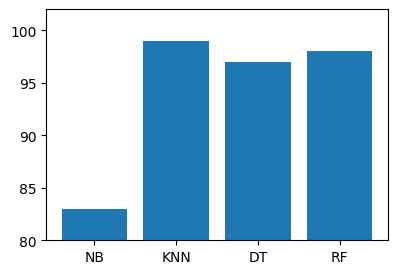

In [58]:
names = ['NB','KNN', 'DT','RF']
values = [83,99,97,98]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)